In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('cleaned_books.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title
0,Riverhead,Paula Hawkins,1594634025,2017-02-19,THE GIRL ON THE TRAIN,102,5
1,Scribner,Anthony Doerr,1501173219,2017-05-07,ALL THE LIGHT WE CANNOT SEE,81,6
2,Vintage,E L James,0525431888,2017-03-05,FIFTY SHADES DARKER,66,3
3,St. Martin's,Kristin Hannah,1466850604,2017-10-29,THE NIGHTINGALE,63,2
4,Penguin Group,Kathryn Stockett,1440697663,2012-04-08,THE HELP,58,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publisher          2248 non-null   object
 1   author             2248 non-null   object
 2   isbn               2248 non-null   object
 3   date               2248 non-null   object
 4   title              2248 non-null   object
 5   weeks_on_list      2248 non-null   int64 
 6   no_of_words_title  2248 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 123.1+ KB


In [4]:
review = pd.read_csv('review_stats.csv')
review = review.drop('Unnamed: 0', 1)
review.head()

,isbn,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,1594634025,4832,8435,417,2082071,3313269,109917,3.92
1,1501173219,4375,10744,565,1005586,2142471,75056,4.33
2,0525431888,71,155,7,737540,1064380,29077,3.84
3,1466850604,631,1480,150,680040,1319418,63407,4.58
4,1440697663,1491,1922,330,2141308,3031266,84485,4.47


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   isbn                     1281 non-null   object 
 1   ratings_count            1281 non-null   int64  
 2   reviews_count            1281 non-null   int64  
 3   text_reviews_count       1281 non-null   int64  
 4   work_ratings_count       1281 non-null   int64  
 5   work_reviews_count       1281 non-null   int64  
 6   work_text_reviews_count  1281 non-null   int64  
 7   average_rating           1281 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 80.2+ KB


# Merging two dataframes

Merging two dataframes df and review via RIGHT JOIN

In [6]:
data = df.merge(review, on='isbn', how='inner')
data.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,Riverhead,Paula Hawkins,1594634025,2017-02-19,THE GIRL ON THE TRAIN,102,5,4832,8435,417,2082071,3313269,109917,3.92
1,Scribner,Anthony Doerr,1501173219,2017-05-07,ALL THE LIGHT WE CANNOT SEE,81,6,4375,10744,565,1005586,2142471,75056,4.33
2,Vintage,E L James,0525431888,2017-03-05,FIFTY SHADES DARKER,66,3,71,155,7,737540,1064380,29077,3.84
3,St. Martin's,Kristin Hannah,1466850604,2017-10-29,THE NIGHTINGALE,63,2,631,1480,150,680040,1319418,63407,4.58
4,Penguin Group,Kathryn Stockett,1440697663,2012-04-08,THE HELP,58,2,1491,1922,330,2141308,3031266,84485,4.47


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1287 non-null   object 
 1   author                   1287 non-null   object 
 2   isbn                     1287 non-null   object 
 3   date                     1287 non-null   object 
 4   title                    1287 non-null   object 
 5   weeks_on_list            1287 non-null   int64  
 6   no_of_words_title        1287 non-null   int64  
 7   ratings_count            1287 non-null   int64  
 8   reviews_count            1287 non-null   int64  
 9   text_reviews_count       1287 non-null   int64  
 10  work_ratings_count       1287 non-null   int64  
 11  work_reviews_count       1287 non-null   int64  
 12  work_text_reviews_count  1287 non-null   int64  
 13  average_rating           1287 non-null   float64
dtypes: float64(1), int64(8),

##### Comment:
The new merged dataframe has more data points than in 'review' dataframe. Therefore, there must be some duplicates and we need to eliminate them

In [8]:
# Check for duplicates based on ISBNs
data['isbn'].duplicated().sum()

6

In [9]:
# Review these duplicates
data[data.duplicated(['isbn'])]

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
708,Penguin Group,Junot Diaz,1594487367,2012-09-30,THIS IS HOW YOU LOSE HER,1,6,81070,184021,6826,89177,197155,7548,3.75
712,Simon & Schuster,Philippa Gregory,1451626142,2012-09-02,THE KINGMAKER'S DAUGHTER,1,3,36,53,7,38213,86153,2849,3.97
715,Kensington Publishing,Lisa Jackson,0758279590,2012-08-26,YOU DON'T WANT TO KNOW,1,5,13,24,5,7699,18878,908,3.79
735,HarperCollins Publishers,Christopher Moore,0061779741,2012-04-22,SACRE BLEU,1,2,24173,49976,2949,30011,60835,3599,3.79
738,HarperCollins Publishers,Adriana Trigiani,0062098063,2012-04-22,THE SHOEMAKER'S WIFE,1,3,74,131,28,75077,136629,8296,3.99
1176,Knopf Doubleday Publishing,Stieg Larsson,0307593673,2012-05-20,THE GIRL WHO KICKED THE HORNET'S NEST,0,7,4544,5893,626,640541,961876,28953,4.22


In [10]:
# Drop these duplicates (with the same ISBNs) from the merged dataframe
data.drop_duplicates(subset ='isbn', inplace = True) 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1286
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1281 non-null   object 
 1   author                   1281 non-null   object 
 2   isbn                     1281 non-null   object 
 3   date                     1281 non-null   object 
 4   title                    1281 non-null   object 
 5   weeks_on_list            1281 non-null   int64  
 6   no_of_words_title        1281 non-null   int64  
 7   ratings_count            1281 non-null   int64  
 8   reviews_count            1281 non-null   int64  
 9   text_reviews_count       1281 non-null   int64  
 10  work_ratings_count       1281 non-null   int64  
 11  work_reviews_count       1281 non-null   int64  
 12  work_text_reviews_count  1281 non-null   int64  
 13  average_rating           1281 non-null   float64
dtypes: float64(1), int64(8),

# More Cleaning

Check for outliers in columns

In [12]:
data.describe()

,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
count,1281.00000,1281.000000,1281.000000,1281.000000,1281.000000,1.281000e+03,1.281000e+03,1281.000000,1281.000000
mean,2.08587,2.788447,6303.367681,13394.940671,626.480874,6.917531e+04,1.264610e+05,4966.917252,3.977908
std,6.27212,1.269125,25584.140842,52285.396699,2232.462220,1.948541e+05,3.165952e+05,10787.522436,0.254302
min,0.00000,1.000000,0.000000,0.000000,0.000000,4.500000e+01,1.770000e+02,2.000000,2.930000
25%,0.00000,2.000000,22.000000,44.000000,5.000000,7.363000e+03,1.562200e+04,656.000000,3.820000
50%,1.00000,3.000000,91.000000,157.000000,20.000000,1.732800e+04,3.443500e+04,1513.000000,3.990000
75%,1.00000,3.000000,995.000000,2220.000000,149.000000,4.640300e+04,9.318300e+04,4069.000000,4.150000
max,102.00000,9.000000,445495.000000,717491.000000,29788.000000,2.582981e+06,3.716929e+06,132562.000000,4.610000


In [13]:
# Divide that the merged dataframe into 4 different dataframes for clear visualization 
df1 = data[['weeks_on_list']]
df2 = data[['no_of_words_title','average_rating']]
df3 = data[['reviews_count','text_reviews_count','work_text_reviews_count','ratings_count']]
df4 = data[['work_reviews_count','work_ratings_count']]

##### Plot the boxplots to visualize the outliers

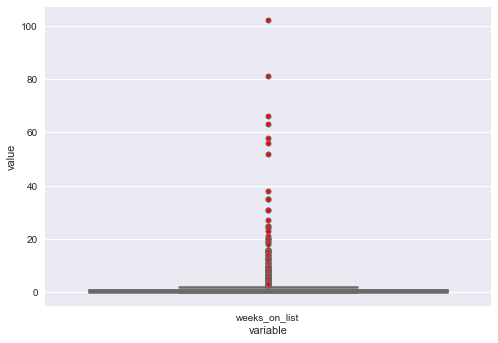

In [14]:
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')
sns.boxplot(x="variable", y="value", data=pd.melt(df1), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

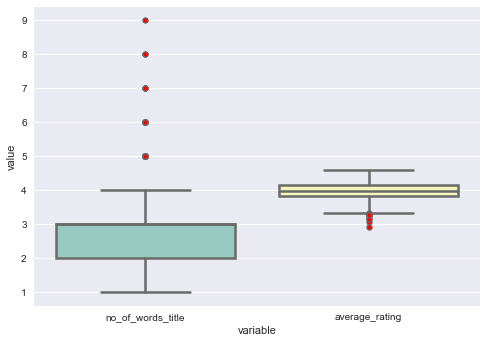

In [15]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

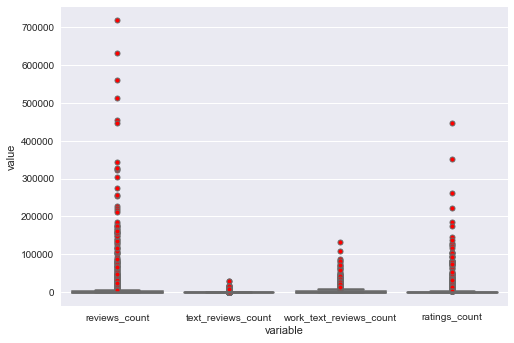

In [16]:
sns.boxplot(x="variable", y="value", data=pd.melt(df3), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

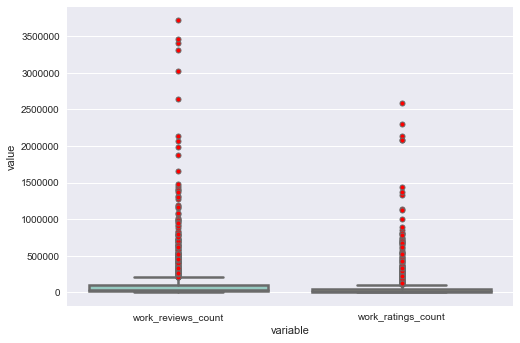

In [17]:
sns.boxplot(x="variable", y="value", data=pd.melt(df4), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

In [18]:
# Limit the ranges in columns to remove outliers
data = data.loc[(data['weeks_on_list'] <= 17)].copy()
data = data.loc[(data['no_of_words_title'] <= 6)].copy()
data = data.loc[(data['average_rating'] > 3.00)].copy()
data = data.loc[(data['reviews_count'] < 200000)].copy()
data = data.loc[(data['text_reviews_count'] < 10000)].copy()
data = data.loc[(data['work_text_reviews_count'] <= 50000)].copy()
data = data.loc[(data['ratings_count'] < 115000)].copy()
data = data.loc[(data['work_reviews_count'] < 1500000)].copy()
data = data.loc[(data['work_ratings_count'] < 1000000)].copy()

In [19]:
# Set the dataframes again after eliminating outliers
df1 = data[['weeks_on_list']]
df2 = data[['no_of_words_title','average_rating']]
df3 = data[['reviews_count','text_reviews_count','work_text_reviews_count','ratings_count']]
df4 = data[['work_reviews_count','work_ratings_count']]

##### Plot the boxplots again to see the results

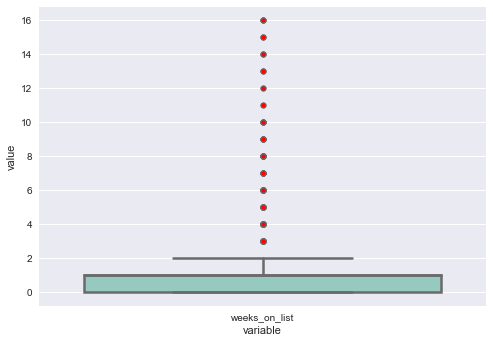

In [20]:
sns.boxplot(x="variable", y="value", data=pd.melt(df1), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

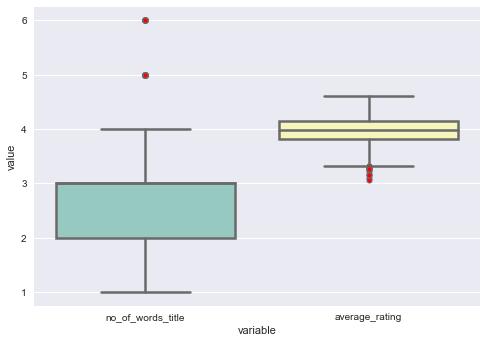

In [21]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

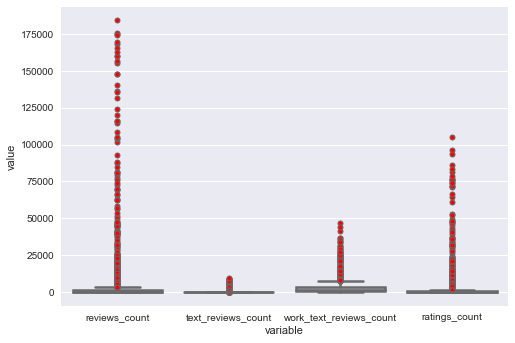

In [22]:
sns.boxplot(x="variable", y="value", data=pd.melt(df3), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

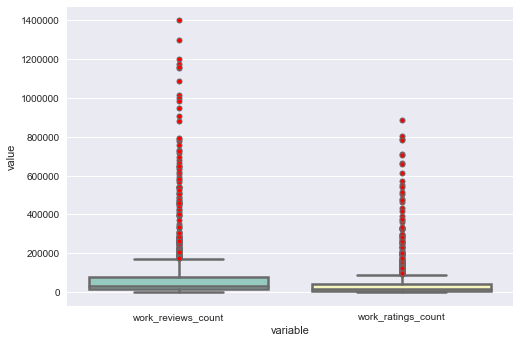

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(df4), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

In [24]:
data.describe()

,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1215.000000,1215.000000
mean,1.360494,2.736626,3751.211523,7941.692181,390.095473,44806.940741,8.466811e+04,3447.869136,3.976741
std,2.317846,1.164310,11864.112871,24450.464957,1151.049818,91514.465811,1.574557e+05,5754.555105,0.251159
min,0.000000,1.000000,0.000000,0.000000,0.000000,45.000000,1.770000e+02,2.000000,3.060000
25%,0.000000,2.000000,21.000000,42.000000,5.000000,7042.000000,1.508450e+04,623.500000,3.820000
50%,1.000000,3.000000,80.000000,146.000000,18.000000,15924.000000,3.180500e+04,1404.000000,3.990000
75%,1.000000,3.000000,676.000000,1446.500000,104.000000,40904.000000,7.837450e+04,3397.500000,4.150000
max,16.000000,6.000000,105021.000000,184021.000000,9413.000000,886392.000000,1.398689e+06,47031.000000,4.610000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 24 to 1286
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1215 non-null   object 
 1   author                   1215 non-null   object 
 2   isbn                     1215 non-null   object 
 3   date                     1215 non-null   object 
 4   title                    1215 non-null   object 
 5   weeks_on_list            1215 non-null   int64  
 6   no_of_words_title        1215 non-null   int64  
 7   ratings_count            1215 non-null   int64  
 8   reviews_count            1215 non-null   int64  
 9   text_reviews_count       1215 non-null   int64  
 10  work_ratings_count       1215 non-null   int64  
 11  work_reviews_count       1215 non-null   int64  
 12  work_text_reviews_count  1215 non-null   int64  
 13  average_rating           1215 non-null   float64
dtypes: float64(1), int64(8)

# Save the cleaned merged dataframe into a new CSV file

In [26]:
data.to_csv('merge_data.csv')